## Part 1: New Regression Analysis

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [9]:
# --- Load the Cleaned Data ---
cleaned_file_path = r"C:\Users\DELL\bootcamp_Dhriti_Trivedi\Project\Data\processed\yahoo_data_cleaned.csv"

try:
    df = pd.read_csv(cleaned_file_path, index_col='Date', parse_dates=True)
    print("Cleaned dataset loaded successfully!")
except FileNotFoundError:
    print(f" Error: The file was not found at the path: {cleaned_file_path}")
    exit()

# --- Original Feature Engineering ---
df['Daily_Return'] = df['Adj Close'].pct_change() * 100
df['Volume_Change'] = df['Volume'].pct_change() * 100
df['Volume_Change_Lag1'] = df['Volume_Change'].shift(1)
print("\n--- Original features created. ---")

# --- Part A: Engineering Volatility Features ---
df['Volatility'] = (df['High'] - df['Low']) / df['Close'] * 100
median_volatility = df['Volatility'].median()
df['Is_High_Volatility'] = (df['Volatility'] > median_volatility).astype(int)
print(f"\n--- Volatility features created. ---")

# --- Part B: Engineering Moving Average Features ---
df['Volume_MA50'] = df['Volume'].rolling(window=50).mean()
df['Volume_vs_Avg'] = (df['Volume'] - df['Volume_MA50']) / df['Volume_MA50'] * 100
print("\n--- Moving average features created. ---")

# --- Finalize the Feature Set ---
df_advanced_model = df.dropna()
print(f"\n--- Final Advanced Dataset for Modeling ---")

# --- Save the Final Engineered Features ---
output_folder = r"C:\Users\DELL\bootcamp_Dhriti_Trivedi\Project\Data\processed"
output_file_path = os.path.join(output_folder, 'yahoo_data_advanced_features.csv')
df_advanced_model.to_csv(output_file_path)
print(f"\n Advanced features dataset saved to: {output_file_path}")


Cleaned dataset loaded successfully!

--- Original features created. ---

--- Volatility features created. ---

--- Moving average features created. ---

--- Final Advanced Dataset for Modeling ---

 Advanced features dataset saved to: C:\Users\DELL\bootcamp_Dhriti_Trivedi\Project\Data\processed\yahoo_data_advanced_features.csv


In [15]:
# --- Cell 1: Load the Advanced Features Data ---
# Load the dataset we created in the updated Notebook 4.
adv_features_path = r"C:\Users\DELL\bootcamp_Dhriti_Trivedi\Project\Data\processed\yahoo_data_advanced_features.csv"

try:
    df = pd.read_csv(adv_features_path, index_col='Date', parse_dates=True)
    print("Advanced features dataset loaded successfully!")
except FileNotFoundError:
    print(f" Error: The file was not found at the path: {adv_features_path}")
    exit()

Advanced features dataset loaded successfully!


In [13]:
# --- Part 1: New Regression Analysis ---
# Hypothesis: Can yesterday's volume relative to its average predict today's return?
print("\n--- Experiment 1: Predicting Daily Return with Volume vs. 50-Day Average ---")

# Define our variables
y_regr = df['Daily_Return']
# We use .shift(1) to use the previous day's data to predict today's return
X_regr = df['Volume_vs_Avg'].shift(1)

# Drop NaN values created by the shift
X_regr.dropna(inplace=True)
y_regr = y_regr.loc[X_regr.index] # Align y with the new index of X

# Add a constant for the intercept
X_regr_const = sm.add_constant(X_regr)

# Create and fit the new OLS model
model_regr = sm.OLS(y_regr, X_regr_const)
results_regr = model_regr.fit()

# Print the summary. Check R-squared and the p-value for 'Volume_vs_Avg'.
print(results_regr.summary())



--- Experiment 1: Predicting Daily Return with Volume vs. 50-Day Average ---
                            OLS Regression Results                            
Dep. Variable:           Daily_Return   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.938
Date:                Sun, 24 Aug 2025   Prob (F-statistic):              0.164
Time:                        18:49:13   Log-Likelihood:                -2092.7
No. Observations:                1208   AIC:                             4189.
Df Residuals:                    1206   BIC:                             4200.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------



--- Experiment 2: Predicting High Volatility Days (Classification) ---

Training set size: 967 samples
Testing set size: 242 samples

Model Accuracy on Test Data: 51.65%

--- Confusion Matrix ---


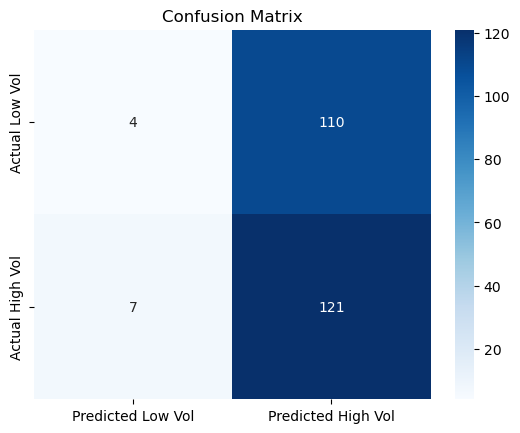

In [17]:
# --- Part 2: New Classification Analysis ---
# Hypothesis: Can yesterday's volume change predict if today will be a high-volatility day?
print("\n\n--- Experiment 2: Predicting High Volatility Days (Classification) ---")

# Define our variables
y_class = df['Is_High_Volatility']
X_class = df[['Volume_Change_Lag1']] # Predictor must be a DataFrame

# Drop NaNs
df_class = pd.concat([y_class, X_class], axis=1).dropna()
y_class = df_class['Is_High_Volatility']
X_class = df_class[['Volume_Change_Lag1']]

# --- Split data into training and testing sets ---
# We train the model on 80% of the data and test its performance on the 20% it has never seen.
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

print(f"\nTraining set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

# --- Build and train the Logistic Regression model ---
# We use Logistic Regression because our target is binary (0 or 1).
model_class = LogisticRegression()
model_class.fit(X_train, y_train)

# --- Evaluate the model on the test set ---
y_pred = model_class.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy on Test Data: {accuracy:.2%}")


# The confusion matrix gives us a better look at performance.
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Low Vol', 'Predicted High Vol'], yticklabels=['Actual Low Vol', 'Actual High Vol'])
plt.title('Confusion Matrix')
plt.show()


## Part 2: New Classification Analysis

In [25]:
# Import libraries for classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



Training set size: 967 samples
Testing set size: 242 samples

Model Accuracy on Test Data: 51.65%

--- Confusion Matrix ---


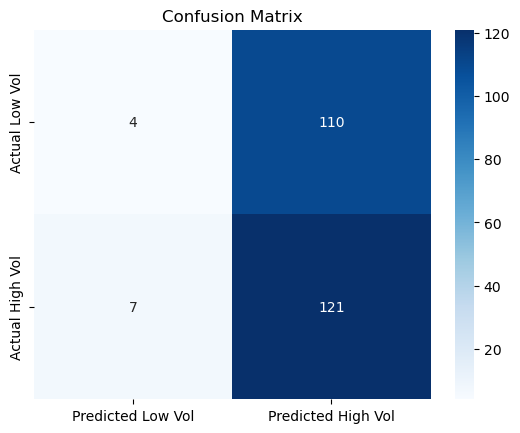

In [27]:
# --- Define our variables ---
# y is our target: Is it a high volatility day (1) or not (0)?
y_class = df['Is_High_Volatility']
# X is our feature: What was the percentage change in volume yesterday?
X_class = df[['Volume_Change_Lag1']] 

# --- Prepare the data ---
# Combine them and drop any rows with missing values to ensure they align.
df_class = pd.concat([y_class, X_class], axis=1).dropna()
y_class = df_class['Is_High_Volatility']
X_class = df_class[['Volume_Change_Lag1']]

# --- Split data into training and testing sets ---
# We'll train the model on 80% of the data and test it on the remaining 20%.
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

# --- Build and train the Logistic Regression model ---
# This type of model is used for predicting a category (like 0 or 1).
model_class = LogisticRegression()
model_class.fit(X_train, y_train)

# --- Evaluate the model on the unseen test data ---
y_pred = model_class.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy on Test Data: {accuracy:.2%}")

# --- Visualize the results with a Confusion Matrix ---
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Low Vol', 'Predicted High Vol'], 
            yticklabels=['Actual Low Vol', 'Actual High Vol'])
plt.title('Confusion Matrix')
plt.show()